# prediction of " scores" obtained using "no.of hrs studying" by student 

In [2]:
import os 
l = r"C:\Users\rishav jha\OneDrive\Documents\sf.csv"
os.path.exists(l)

True

In [3]:
import pandas as pd
import numpy as np

In [4]:

df = pd.read_csv(l)
df.head()

,hours,scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:

df.dtypes # both variables are continuous

hours     float64
scores      int64
dtype: object

In [6]:
df.describe(include = "all") # include = "all" method include object type data i..e categorical data

,hours,scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# after Data acquisition , next step must be data wrangling:-



# data wrangling - fil empty cell,dropping cells,correct data types if any! 

In [8]:
df1 = df.isnull() 
df1.head()


,hours,scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [9]:
for column in df1.columns.values.tolist():
    print(column)
    print(df1[column].value_counts())

hours
False    25
Name: hours, dtype: int64
scores
False    25
Name: scores, dtype: int64


In [10]:
df.shape  # there is no null data

(25, 2)

In [11]:
df.replace("?", np.nan , inplace = True)#This method used to replace the null data by nan for speed in computation in pandas

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use("ggplot")
# use ggplot and importing style module gives a better view

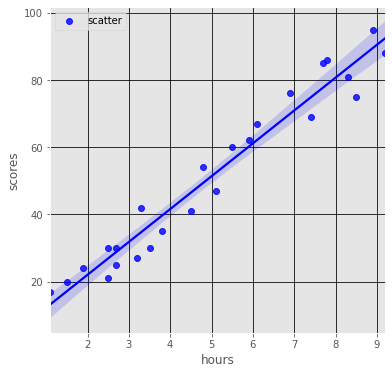

In [14]:
plt.figure(figsize = (6,6))
sns.regplot(x = "hours", y ="scores", data = df , color = 'b',label = "scatter")
plt.grid(color = 'black')
plt.legend()


In [15]:
df.corr()

,hours,scores
hours,1.000000,0.976191
scores,0.976191,1.000000


# creating ML model to predict Unknown value

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression() #making linear regression object
x = df[["hours"]]
y = df[["scores"]]

In [18]:
lr.fit(x, y)

LinearRegression()

In [19]:
lr.coef_

array([[9.77580339]])

In [20]:
lr.intercept_

array([2.48367341])

# scores = 2.4836 + 9.7758* hours      ...........linear regress.model


In [80]:
fut_data = [1.2, 4.5 , 6, 9.25 , 7 , 3.45]
Df = pd.DataFrame(fut_data)
Df.columns = {"fut_data"}
Df
l = []
import random
for i in range(25):
    x = random.randint(0 , 15)
    l.append(x)
print(l)
df["test_data"] = l
df[["test_data"]]
yhat = lr.predict(df[["test_data"]])
df["yhat"] = 
df.head()
    
    

[4, 5, 8, 10, 3, 12, 6, 12, 4, 4, 15, 2, 3, 15, 4, 8, 2, 10, 0, 2, 8, 11, 4, 8, 5]


,hours,scores,test_data,yhat
0,2.5,21,4,41.586887
1,5.1,47,5,51.362690
2,3.2,27,8,80.690101
3,8.5,75,10,100.241707
4,3.5,30,3,31.811084


In [49]:
k = lr.predict(Df)
k

array([[14.21463747],
       [46.47478866],
       [61.13849375],
       [92.90985477],
       [70.91429714],
       [36.2101951 ]])

<AxesSubplot:xlabel='hours', ylabel='scores'>

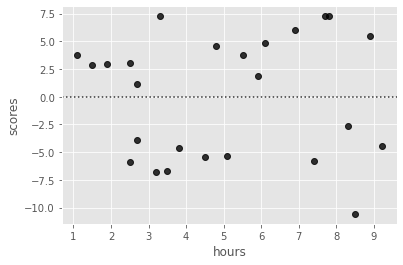

In [84]:
sns.residplot(x = df[["hours"]], y = df[["scores"]], color = 'black')

# residual plot have no curvature and evenly distributed in both sides.

# overall this model can be accepted!